In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft, fftfreq, rfft, rfftfreq, fftshift, ifft
from IPython.display import display, Audio
import scipy.special as special

#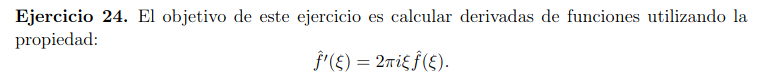

##props

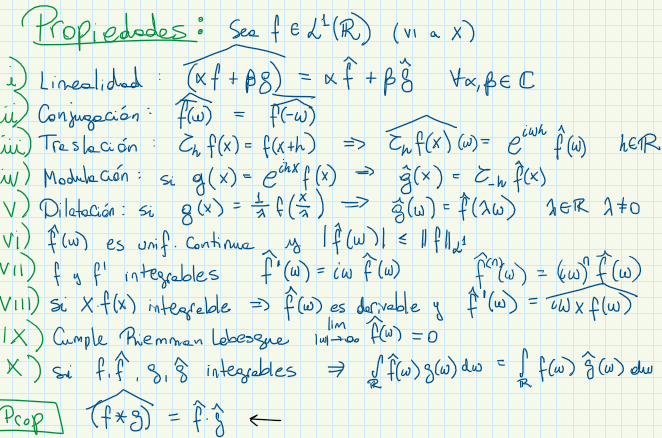

##.

In [7]:
def derivada_fft(f, L, N):
  k = np.fft.fftfreq(N, 1/N)
  derivada_fft = ifft(k * 1j * 2 * np.pi * 1/L * fft(y)).real
  return derivada_fft

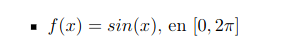

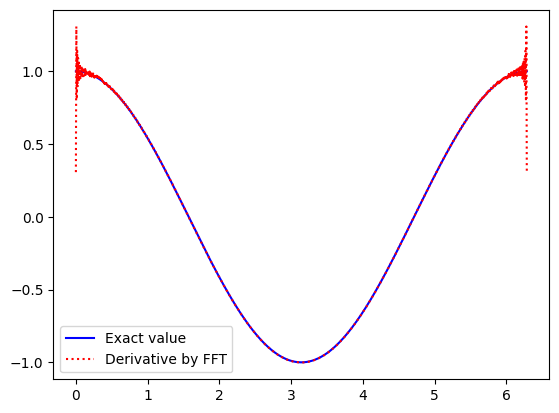

In [8]:
N = 1024
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)
dydx = np.cos(x)
L = 2*np.pi

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,derivada_fft(y, L, N),':r', label='Derivative by FFT')
plt.legend()
plt.show()

imagen.png

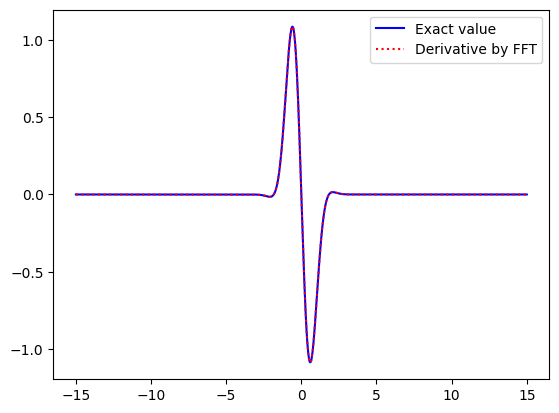

In [9]:
L = 30
N = 1024
x = np.linspace(-15, 15, N)
y = np.cos(x) * np.exp(-x**2)
dydx = -2*x * np.cos(x) * np.exp(-x**2) - np.sin(x) * np.exp(-x**2)

plt.plot(x,dydx,'b',label='Exact value')
plt.plot(x,derivada_fft(y, L, N),':r', label='Derivative by FFT')
plt.legend()
plt.show()

imagen.png

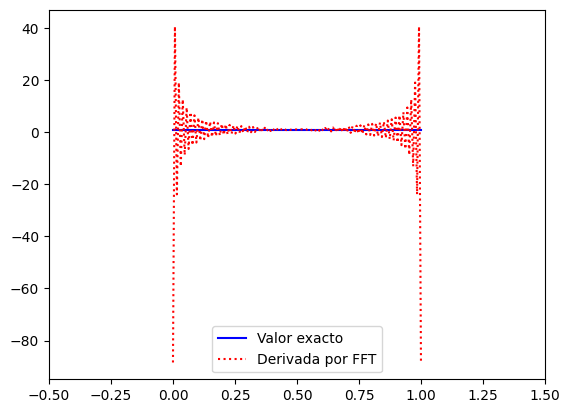

In [10]:
L = 1
N = 128
x = np.linspace(0, 1, N)
y = x
dydx = np.ones(N)

plt.plot(x, dydx, 'b', label='Valor exacto')
plt.plot(x, derivada_fft(y,L, N), ':r', label='Derivada por FFT')
plt.xlim(-0.5, 1.5)
plt.legend()
plt.show()

En el borde hay fenómeno de Gibbs porque se aproxima al núcleo de dirichlet


#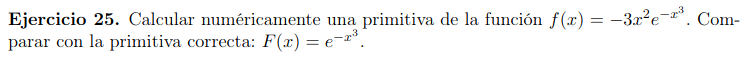

[-8.15484549 -7.76732615 -7.40098043 ...  0.          0.
  0.        ]


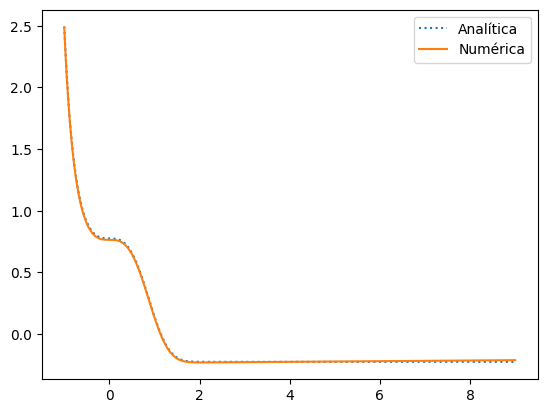

In [11]:
def fft_int(s, dydt, N=0):
  dydt_padded = np.pad(dydt, (0,N))
  print(dydt_padded)
  f = fftfreq(dydt_padded.shape[0], s)
  F = fft(dydt_padded)
  with np.errstate(divide='ignore', invalid='ignore'):
    F = F/ (2*np.pi*1j*f)
  F[0] = 0
  y_padded = np.real(ifft(F))
  y = y_padded[0:dydt.shape[0]]
  return y - np.mean(y)

N = 2**10
x = np.linspace(-1, 9, N)
s = x[1]-x[0]

y = np.exp(-x**3)
dy = -3 * x**2 * np.exp(-x**3)

plt.plot(x, y - np.mean(y), ":", label = "Analítica")
plt.plot(x, fft_int(s, dy,100* N), label = "Numérica")
plt.legend()
plt.show()

#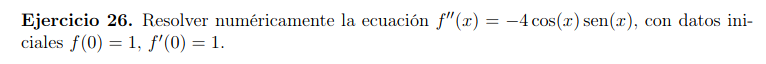

In [25]:
def fourier_primitiva_segunda(ddf,izq=0,der=2*np.pi,N=2**10,f0=[]):
  #f0 =[f(0),f'(0)] si izq=0 sino usar f(izq) o revisar codigo
  t = np.linspace(izq,der,N)
  y = ddf(t)
  k = fftfreq(N,1/N)
  k[0]=np.inf
  transf=fft(y)*((der-izq)/(k*1j*2*np.pi))**2
  transf[0]=0
  F=ifft(transf).real

  if(len(f0)==2):
    transf1=(der-izq)*fft(y)/(k*1j*2*np.pi)
    transf1[0]=0
    df = ifft(transf1).real
    a=f0[1]-df[0]
    b=f0[0]-F[0]-a*izq
    F=F+a*t+b

  return t,F

<ipython-input-25-943ec4d93a73>:7: RuntimeWarning: invalid value encountered in multiply
  transf=fft(y)*((der-izq)/(k*1j*2*np.pi))**2
<ipython-input-25-943ec4d93a73>:7: RuntimeWarning: invalid value encountered in divide
  transf=fft(y)*((der-izq)/(k*1j*2*np.pi))**2
<ipython-input-25-943ec4d93a73>:12: RuntimeWarning: invalid value encountered in multiply
  transf1=(der-izq)*fft(y)/(k*1j*2*np.pi)
<ipython-input-25-943ec4d93a73>:12: RuntimeWarning: invalid value encountered in divide
  transf1=(der-izq)*fft(y)/(k*1j*2*np.pi)


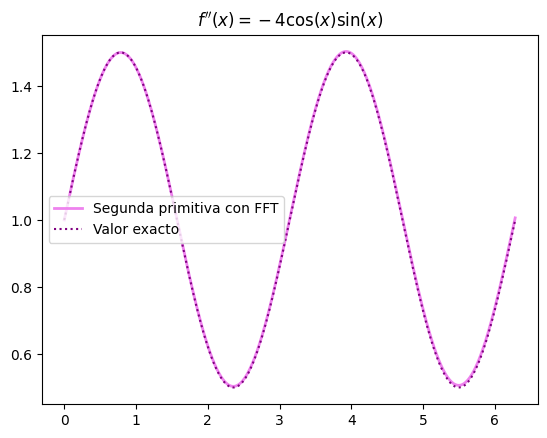

In [26]:
# Definir las funciones dadas
ddf26 = lambda x: -4 * np.cos(x) * np.sin(x)
f26 = lambda x: np.sin(2 * x) / 2 + 1

# Calcular la segunda primitiva usando Fourier
t26, fourier26 = fourier_primitiva_segunda(ddf26, 0, 2 * np.pi, 2**10, f0=[1, 1])

# Graficar el resultado
plt.plot(t26, fourier26, linewidth=2, color='violet', label='Segunda primitiva con FFT')
plt.plot(t26, f26(t26), ':', color='purple', label='Valor exacto')
plt.title('$f\'\'(x)=-4\\cos(x)\\sin(x)$')
plt.legend()
plt.show()